In [4]:
import pandas as pd
import numpy as np
for i in range(730):
        # Define the days of the week and times of the day
        days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        times_of_day = [f'{hour}:00' for hour in range(24)]  # 24 hours
        
        # Function to generate productivity based on time of day
        def generate_productivity(hour):
            if 9 <= hour < 14:
                return round(np.random.uniform(0.8, 1.0), 2)  # Peak productivity
            elif 2 <= hour < 8:
                return round(np.random.uniform(0.1, 0.3), 2)  # Lowest productivity
            else:
                return round(np.random.uniform(0.4, 0.7), 2)  # Moderate productivity
        
        # Generate data for 730 days
        data = []
        for day in range(730):
            day_of_week = days_of_week[day % 7]
            for time in times_of_day:
                hour = int(time.split(':')[0])
                productivity = generate_productivity(hour)
                data.append([day_of_week, time, productivity])
        
        # Create a DataFrame
        df = pd.DataFrame(data, columns=['day_of_week', 'time_of_day', 'productivity'])
        
        # Save to CSV
        df.to_csv(r"C:\Users\ashut\OneDrive\Documents\student_productivity.csv", index=False)
        
        print("Dataset generated and saved to 'student_productivity.csv'")


Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset generated and saved to 'student_productivity.csv'
Dataset genera

Mean Squared Error: 0.019075980934519222


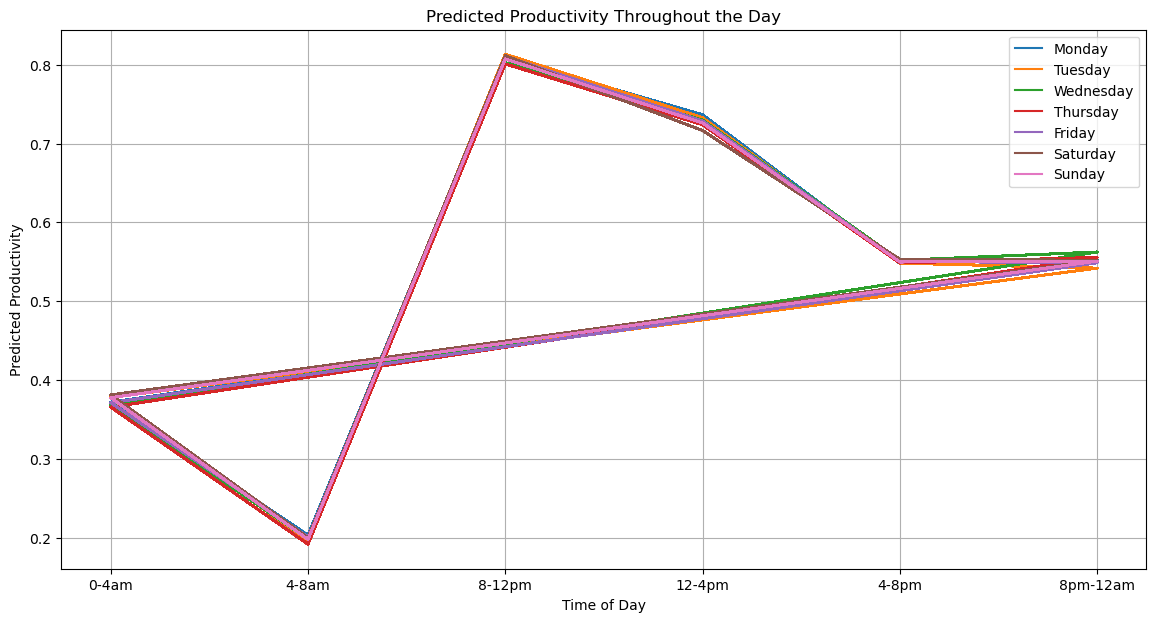

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv(r"C:\Users\ashut\OneDrive\Documents\student_productivity.csv")

# Convert day_of_week to numerical values
data['day_of_week'] = data['day_of_week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

# Convert time_of_day to numerical values (hour of the day)
data['time_of_day'] = data['time_of_day'].str.replace(':00', '').astype(int)

# Create 4-hour slots
def get_time_slot(hour):
    if 0 <= hour < 4:
        return 0
    elif 4 <= hour < 8:
        return 1
    elif 8 <= hour < 12:
        return 2
    elif 12 <= hour < 16:
        return 3
    elif 16 <= hour < 20:
        return 4
    else:
        return 5

data['time_slot'] = data['time_of_day'].apply(get_time_slot)

# Split the data into features and target
X = data[['day_of_week', 'time_slot']]
y = data['productivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict productivity for the entire dataset
data['predicted_productivity'] = model.predict(X)

# Calculate average productivity for each 4-hour slot
average_productivity = data.groupby(['day_of_week', 'time_slot'])['predicted_productivity'].mean().reset_index()

# Save the average productivity to a new CSV file
average_productivity.to_csv(r"C:\Users\ashut\OneDrive\Documents\4hr-slots.csv", index=False)

# Plot the productivity graph for each day
plt.figure(figsize=(14, 7))
time_labels = ['0-4am', '4-8am', '8-12pm', '12-4pm', '4-8pm', '8pm-12am']
for day in range(7):
    day_data = data[data['day_of_week'] == day]
    plt.plot(day_data['time_slot'] * 4, day_data['predicted_productivity'], label=f'Day {day}')

plt.xticks(ticks=[0, 4, 8, 12, 16, 20], labels=time_labels)
plt.xlabel('Time of Day')
plt.ylabel('Predicted Productivity')
plt.title('Predicted Productivity Throughout the Day')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


C:\Users\ashut\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0721
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0095
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0091
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0089
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0085
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0082
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0074
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0070
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0065
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0063
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Mean Squared Error: 0.11700718805645087
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Users\ashut\AppData\Local\Temp\ipykernel_17724\259750393.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_productivity'].iloc[sequence_length:] = predicted_productivity.flatten()


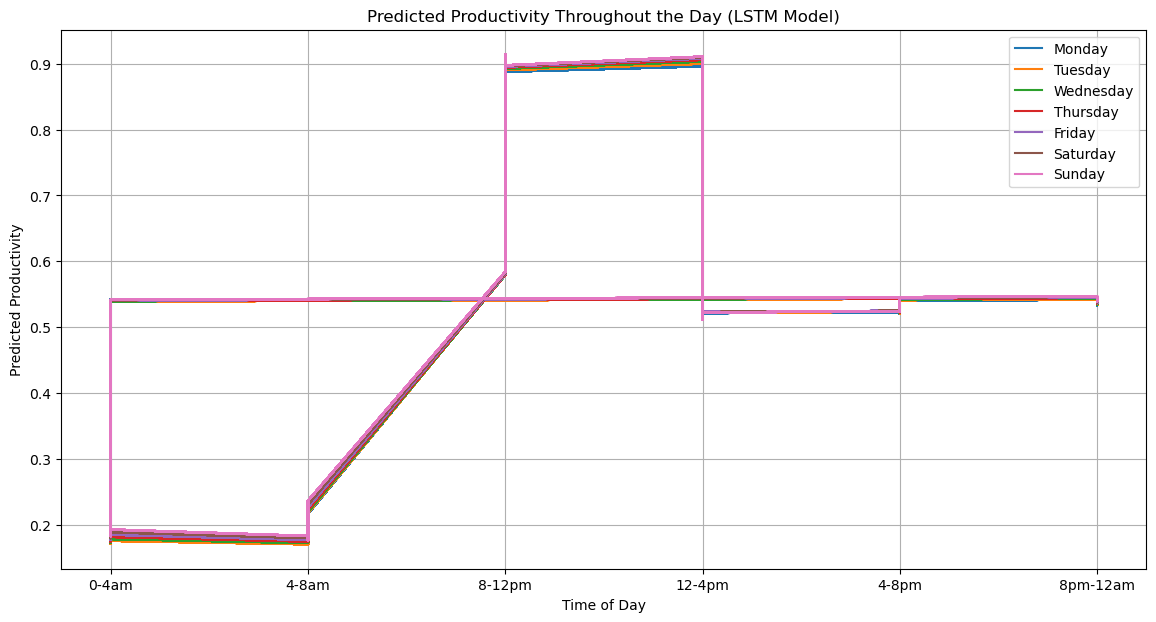

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv(r"C:\Users\ashut\OneDrive\Documents\student_productivity.csv")

# Convert day_of_week and time_of_day to numerical values
data['day_of_week'] = data['day_of_week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
})
data['time_of_day'] = data['time_of_day'].str.replace(':00', '').astype(int)

# Create 4-hour slots
def get_time_slot(hour):
    if 0 <= hour < 4:
        return 0
    elif 4 <= hour < 8:
        return 1
    elif 8 <= hour < 12:
        return 2
    elif 12 <= hour < 16:
        return 3
    elif 16 <= hour < 20:
        return 4
    else:
        return 5

data['time_slot'] = data['time_of_day'].apply(get_time_slot)

# Select features (day_of_week and time_slot) and target (productivity)
X = data[['day_of_week', 'time_slot']]
y = data['productivity']

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape the input to be 3D for LSTM (samples, time steps, features)
# Assume each day is treated as a separate sequence with time slots
X_lstm = []
y_lstm = []

sequence_length = 6  # Number of time slots (0-4am, 4-8am, etc.)
for i in range(len(X_scaled) - sequence_length):
    X_lstm.append(X_scaled[i:i + sequence_length])
    y_lstm.append(y[i + sequence_length])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Split the data into training and testing sets
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(sequence_length, 2)))  # 2 features
model.add(LSTM(units=32))
model.add(Dense(1))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
mse = np.mean(np.square(y_pred - y_test))
print(f'Mean Squared Error: {mse}')

# Predict productivity for the entire dataset
predicted_productivity = model.predict(X_lstm)

# Prepare the results for plotting
data['predicted_productivity'] = np.nan
data['predicted_productivity'].iloc[sequence_length:] = predicted_productivity.flatten()

# Calculate average productivity for each 4-hour slot
average_productivity = data.groupby(['day_of_week', 'time_slot'])['predicted_productivity'].mean().reset_index()

# Save the average productivity to a new CSV file
average_productivity.to_csv(r"C:\Users\ashut\OneDrive\Documents\4hr-slots-lstm.csv", index=False)

# Plot the productivity graph for each day
plt.figure(figsize=(14, 7))
time_labels = ['0-4am', '4-8am', '8-12pm', '12-4pm', '4-8pm', '8pm-12am']
for day in range(7):
    day_data = data[data['day_of_week'] == day]
    plt.plot(day_data['time_slot'] * 4, day_data['predicted_productivity'], label=f'Day {day}')

plt.xticks(ticks=[0, 4, 8, 12, 16, 20], labels=time_labels)
plt.xlabel('Time of Day')
plt.ylabel('Predicted Productivity')
plt.title('Predicted Productivity Throughout the Day (LSTM Model)')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()
